**TRANSFER LEARNING FOR IMAGE CLASSIFICATION**

In [1]:
# Introduction and Setup
# Import necessary libraries
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.applications import MobileNetV2
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Data Loading and Preprocessing
# Loading the CIFAR-10 dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Specifying new labels for dog and car classes
dog_label, car_label = 5, 1

# Creating boolean masks for filtering dog and car images in the training set
dog_car_indices_train = np.logical_or(train_labels.flatten() == dog_label, train_labels.flatten() == car_label)

# Creating boolean masks for filtering dog and car images in the test set
dog_car_indices_test = np.logical_or(test_labels.flatten() == dog_label, test_labels.flatten() == car_label)

# Applying the masks to filter images and labels in the training set
train_images, train_labels = train_images[dog_car_indices_train], train_labels[dog_car_indices_train]

# Applying the masks to filter images and labels in the test set
test_images, test_labels = test_images[dog_car_indices_test], test_labels[dog_car_indices_test]


In [3]:
# Standardize pixel values to fall within the range of 0 to 1
train_images, test_images = train_images / 255.0, test_images / 255.0

In [4]:
# Transform labels into one-hot encoded format
train_labels = to_categorical(train_labels, num_classes=10)[:, [dog_label, car_label]]
test_labels = to_categorical(test_labels, num_classes=10)[:, [dog_label, car_label]]


In [5]:
# Model Selection and Preprocessing
# Instantiate MobileNetV2 model with pre-trained weights, excluding the top layers
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(32, 32, 3))

In [6]:
# Freeze the pre-trained layers
for layer in base_model.layers:
    layer.trainable = False

In [7]:
# Instantiate a new model and incorporate the MobileNetV2 base model
model = models.Sequential()
model.add(base_model)

In [8]:
# Flatten the output and introduce dense layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(2, activation='softmax'))  # Output layer with 2 classes (bird and plane)


In [9]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [10]:
# Fine-tuning
# Unfreeze the last few layers for fine-tuning
for layer in model.layers[-6:]:
    layer.trainable = True

# Compile the model after freezing/unfreezing layers
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Fine-tune the model on the dataset
epochs = 20

history = model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))



Epoch 1/20
313/313 [==============================] - 81s 197ms/step - loss: 0.2235 - accuracy: 0.9240 - val_loss: 1.7644 - val_accuracy: 0.6860
Epoch 2/20
313/313 [==============================] - 63s 200ms/step - loss: 0.1261 - accuracy: 0.9600 - val_loss: 0.1048 - val_accuracy: 0.9625
Epoch 3/20
313/313 [==============================] - 60s 193ms/step - loss: 0.0860 - accuracy: 0.9701 - val_loss: 0.5999 - val_accuracy: 0.8335
Epoch 4/20
313/313 [==============================] - 60s 193ms/step - loss: 0.0752 - accuracy: 0.9765 - val_loss: 0.2797 - val_accuracy: 0.8965
Epoch 5/20
313/313 [==============================] - 60s 191ms/step - loss: 0.0580 - accuracy: 0.9844 - val_loss: 0.6351 - val_accuracy: 0.7600
Epoch 6/20
313/313 [==============================] - 60s 193ms/step - loss: 0.0505 - accuracy: 0.9863 - val_loss: 0.1845 - val_accuracy: 0.9655
Epoch 7/20
313/313 [==============================] - 61s 196ms/step - loss: 0.0430 - accuracy: 0.9867 - val_loss: 0.4822 - val_ac

In [11]:
# Training
# Train the model
model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))

Epoch 1/20
313/313 [==============================] - 60s 190ms/step - loss: 0.0418 - accuracy: 0.9864 - val_loss: 1.6894 - val_accuracy: 0.8710
Epoch 2/20
313/313 [==============================] - 62s 199ms/step - loss: 0.0205 - accuracy: 0.9940 - val_loss: 1.6763 - val_accuracy: 0.9020
Epoch 3/20
313/313 [==============================] - 61s 193ms/step - loss: 0.0118 - accuracy: 0.9958 - val_loss: 0.0838 - val_accuracy: 0.9885
Epoch 4/20
313/313 [==============================] - 61s 196ms/step - loss: 0.0271 - accuracy: 0.9920 - val_loss: 0.5199 - val_accuracy: 0.9380
Epoch 5/20
313/313 [==============================] - 61s 194ms/step - loss: 0.0469 - accuracy: 0.9926 - val_loss: 0.6301 - val_accuracy: 0.9645
Epoch 6/20
313/313 [==============================] - 60s 191ms/step - loss: 0.0069 - accuracy: 0.9979 - val_loss: 0.4069 - val_accuracy: 0.9545
Epoch 7/20
313/313 [==============================] - 62s 198ms/step - loss: 0.0050 - accuracy: 0.9980 - val_loss: 0.1378 - val_ac

In [12]:
# Evaluation
# Evaluate the model
test_loss, test_acc = model.evaluate(test_images, test_labels)
print(f"Test accuracy: {test_acc}")

63/63 [==============================] - 2s 27ms/step - loss: 0.1729 - accuracy: 0.9750
Test accuracy: 0.9750000238418579


In [13]:
# Results Comparison
# A Code is written for training a model from scratch (for comparison)
scratch_model = models.Sequential()
scratch_model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
scratch_model.add(layers.MaxPooling2D((2, 2)))
scratch_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
scratch_model.add(layers.MaxPooling2D((2, 2)))
scratch_model.add(layers.Conv2D(64, (3, 3), activation='relu'))
scratch_model.add(layers.Flatten())
scratch_model.add(layers.Dense(64, activation='relu'))
scratch_model.add(layers.Dense(2, activation='softmax'))  # Output layer with 2 classes (bird and plane)

scratch_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

scratch_history = scratch_model.fit(train_images, train_labels, epochs=epochs, validation_data=(test_images, test_labels))


Epoch 1/20
313/313 [==============================] - 15s 44ms/step - loss: 0.2581 - accuracy: 0.8909 - val_loss: 0.2655 - val_accuracy: 0.8915
Epoch 2/20
313/313 [==============================] - 13s 43ms/step - loss: 0.1470 - accuracy: 0.9468 - val_loss: 0.1220 - val_accuracy: 0.9540
Epoch 3/20
313/313 [==============================] - 13s 42ms/step - loss: 0.1178 - accuracy: 0.9582 - val_loss: 0.0978 - val_accuracy: 0.9635
Epoch 4/20
313/313 [==============================] - 13s 42ms/step - loss: 0.1067 - accuracy: 0.9611 - val_loss: 0.1771 - val_accuracy: 0.9300
Epoch 5/20
313/313 [==============================] - 13s 42ms/step - loss: 0.0920 - accuracy: 0.9669 - val_loss: 0.1060 - val_accuracy: 0.9590
Epoch 6/20
313/313 [==============================] - 13s 42ms/step - loss: 0.0822 - accuracy: 0.9693 - val_loss: 0.0867 - val_accuracy: 0.9720
Epoch 7/20
313/313 [==============================] - 14s 44ms/step - loss: 0.0643 - accuracy: 0.9767 - val_loss: 0.1118 - val_accuracy:

In [14]:
# Comparing results using appropriate visualizations or statistical analyses
# Comparing training/validation accuracy and loss curves
plt.figure(figsize=(12, 4))

<Figure size 1200x400 with 0 Axes>

<Figure size 1200x400 with 0 Axes>

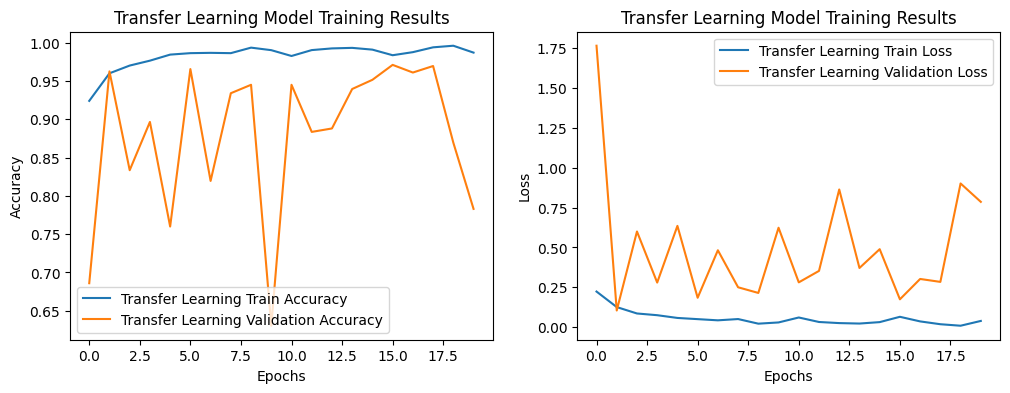

In [15]:
# Plot Transfer Learning Model Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Transfer Learning Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Transfer Learning Validation Accuracy')
plt.title('Transfer Learning Model Training Results')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Transfer Learning Train Loss')
plt.plot(history.history['val_loss'], label='Transfer Learning Validation Loss')
plt.title('Transfer Learning Model Training Results')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

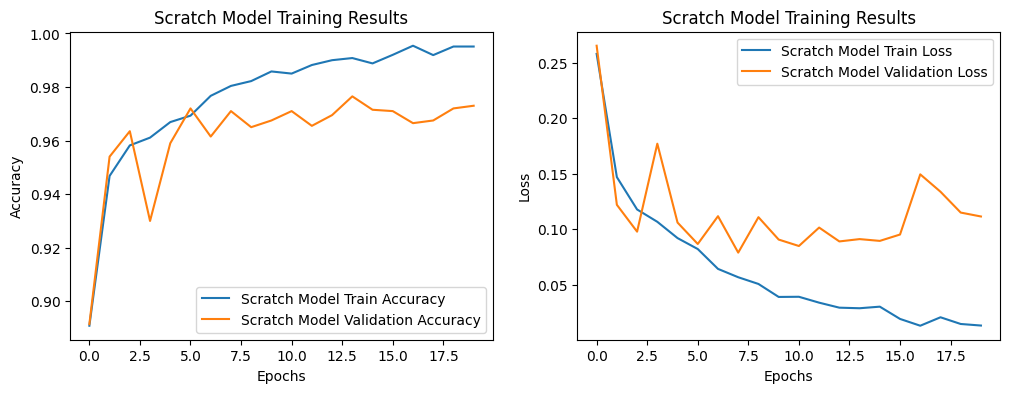

In [16]:
# Plot Scratch Model Results
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(scratch_history.history['accuracy'], label='Scratch Model Train Accuracy')
plt.plot(scratch_history.history['val_accuracy'], label='Scratch Model Validation Accuracy')
plt.title('Scratch Model Training Results')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(scratch_history.history['loss'], label='Scratch Model Train Loss')
plt.plot(scratch_history.history['val_loss'], label='Scratch Model Validation Loss')
plt.title('Scratch Model Training Results')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()